<a href="https://colab.research.google.com/github/reinmalaca/MALACA_CNN_Image_Classification_Ovarian_Tumour/blob/main/MALACA_BEELEC_EG1_IndividualProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the 'os' module for interacting with the operating system (e.g., file and directory operations)
import os
# Importing the 'numpy' library for numerical operations, particularly for arrays and matrices
import numpy as np
# Importing the 'cv2' (OpenCV) library for computer vision tasks like image processing
import cv2
# Importing the 'skimage' library for advanced image processing functions
import skimage
# Importing preprocessing tools from 'sklearn' for scaling, normalizing, or transforming data
from sklearn import preprocessing
# Importing the train_test_split function to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Importing accuracy_score from 'sklearn.metrics' to evaluate model accuracy
from sklearn.metrics import accuracy_score
# Importing 'scipy' for scientific and technical computations
import scipy
# Importing 'matplotlib.pyplot' for creating visualizations like plots and charts
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/A3T2/BEELEC1/MALACA_EG1_BEELEC1_Individual Project/'

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/A3T2/BEELEC1/MALACA_EG1_BEELEC1_Individual Project/'

from google.colab import drive
# Mount Google Drive to access the files stored on it
drive.mount('/content/drive')
# Set the paths to the directories where the 'tumour' and 'non-tumour' image folders are stored in Google Drive
PATH_NONTUMOUR = '/content/drive/MyDrive/A3T2/BEELEC1/MALACA_EG1_BEELEC1_IndividualProject/non-tumour'
PATH_TUMOUR = '/content/drive/MyDrive/A3T2/BEELEC1/MALACA_EG1_BEELEC1_IndividualProject/tumour'

# Initialize two empty lists to store image data (IMGS) and their corresponding labels (LABELS)
IMGS=[]
LABELS=[]

# Function to randomly sample and load images (20%)
def load_images(path, label):
    files = sorted(os.listdir(path))  # Sort files to ensure order
    sampled_files = files[::8] # Select every 10th file

    # Limit to at most 1500 images
    sampled_files = sampled_files[:1500]

    # Print diagnostic information:
    print(f"Directory: {path}")
    print(f"Total files: {len(files)}")
    print(f"Selected images (every 8th): {len(sampled_files)}")

    for f in sampled_files:
        img_path = os.path.join(path, f)
        img = cv2.imread(img_path)  # Read image
        if img is not None:  # Skip unreadable images
            IMGS.append(img)
            LABELS.append(label)

# Load images from each folder
load_images(PATH_NONTUMOUR, label=0)
load_images(PATH_TUMOUR, label=1)

# Print dataset statistics
print(f"Total images loaded: {len(IMGS)}")
print(f"Total labels assigned: {len(LABELS)}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Directory: /content/drive/MyDrive/A3T2/BEELEC1/MALACA_EG1_BEELEC1_IndividualProject/non-tumour
Total files: 13393
Selected images (every 8th): 1500
Directory: /content/drive/MyDrive/A3T2/BEELEC1/MALACA_EG1_BEELEC1_IndividualProject/tumour
Total files: 13363
Selected images (every 8th): 1500
Total images loaded: 3000
Total labels assigned: 3000


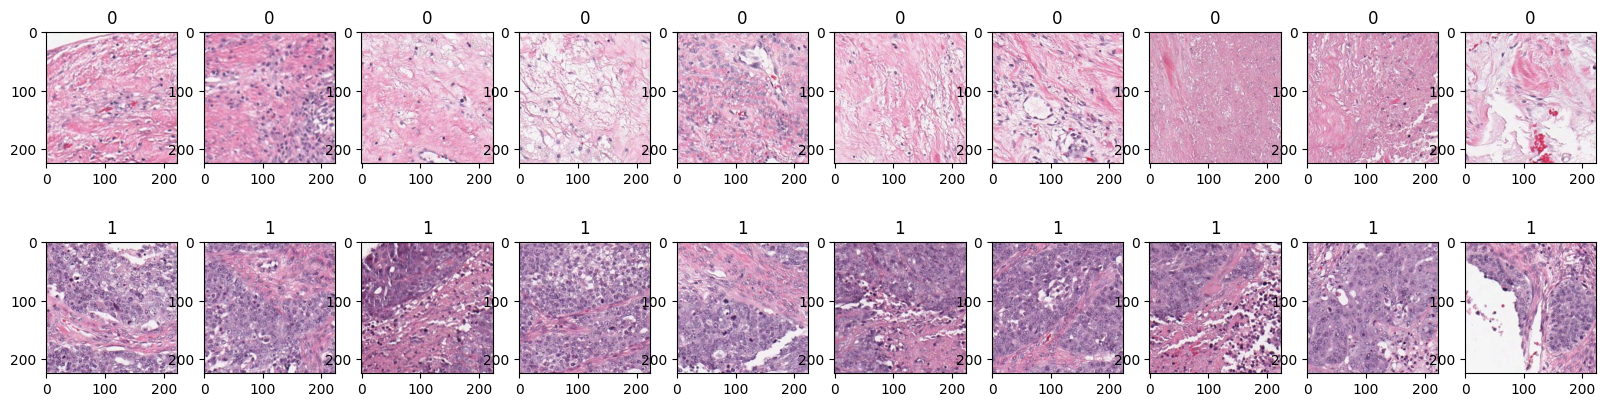

In [ ]:
# Set the number of images to display from each class
len_img = 10 # Display 10 images from each class

# Create a figure with subplots for displaying images (2 rows, 'len_img' columns)
fig, ax=plt.subplots(2,len_img,figsize=(20,5))

# Loop through the first 'len_img' images in the 'IMGS' list for the 'non-tumour' class
for i in range(0, len_img):
    # Convert the image from BGR to RGB (OpenCV uses BGR by default) and display it
    ax[0][i].imshow(cv2.cvtColor(IMGS[i], cv2.COLOR_BGR2RGB))
    # Set the title of the image with the corresponding label (0 for 'non-tumour' class)
    ax[0][i].set_title(LABELS[i])

# Loop through the next 'len_img' images in the 'IMGS' list for the 'tumour' class (second half of the dataset)
for i in range(0, len_img):
    # Convert the image from BGR to RGB and display it
    ax[1][i].imshow(cv2.cvtColor(IMGS[len(IMGS)//2 + i], cv2.COLOR_BGR2RGB))
    # Set the title of the image with the corresponding label ('1' for 'tumour' class)
    ax[1][i].set_title(LABELS[len(IMGS)//2 + i])

In [ ]:
# Initialize empty lists to store processed images and masks
IMGS_MASK = []  # List to store the binary masks for the images
IMGS_SEG_GRAY = []  # List to store grayscale segmented images
IMGS_SEG_COLOR = []  # List to store color segmented images

# Set the size of the kernel for Gaussian Blur and morphological operations
blur_ksize = (5, 5)  # Kernel size for Gaussian Blur
morph_ksize = 7      # Size of the kernel for morphological operations
morph_kernel = np.ones((morph_ksize, morph_ksize), np.uint8)  # Creating a square morphological kernel (7x7)

# Loop through all the images in the IMGS list
for i in IMGS:
    # Convert the current image to grayscale (BGR to Grayscale)
    img_GRAY = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to the grayscale image to reduce noise
    img_GRAY = cv2.GaussianBlur(img_GRAY, blur_ksize, 0)

    # Perform Otsu Thresholding to create a binary mask (inverted binary mask)
    ret, mask_gray_otsu = cv2.threshold(img_GRAY, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Perform morphological opening (removes small white regions) on the thresholded mask
    mask_morph = cv2.morphologyEx(mask_gray_otsu, cv2.MORPH_OPEN, morph_kernel)

    # Use the binary mask to segment the grayscale image (keep only the parts where the mask is 1)
    img_SEG_GRAY = cv2.bitwise_and(img_GRAY, img_GRAY, mask=mask_morph)

    # Use the binary mask to segment the color image (keep only the parts where the mask is 1)
    img_SEG_COLOR = cv2.bitwise_and(i, i, mask=mask_morph)

    # Append the processed grayscale segmented image to the list
    IMGS_SEG_GRAY.append(img_SEG_GRAY)

    # Append the processed color segmented image to the list
    IMGS_SEG_COLOR.append(img_SEG_COLOR)

    # Append the binary morphological mask to the list
    IMGS_MASK.append(mask_morph)

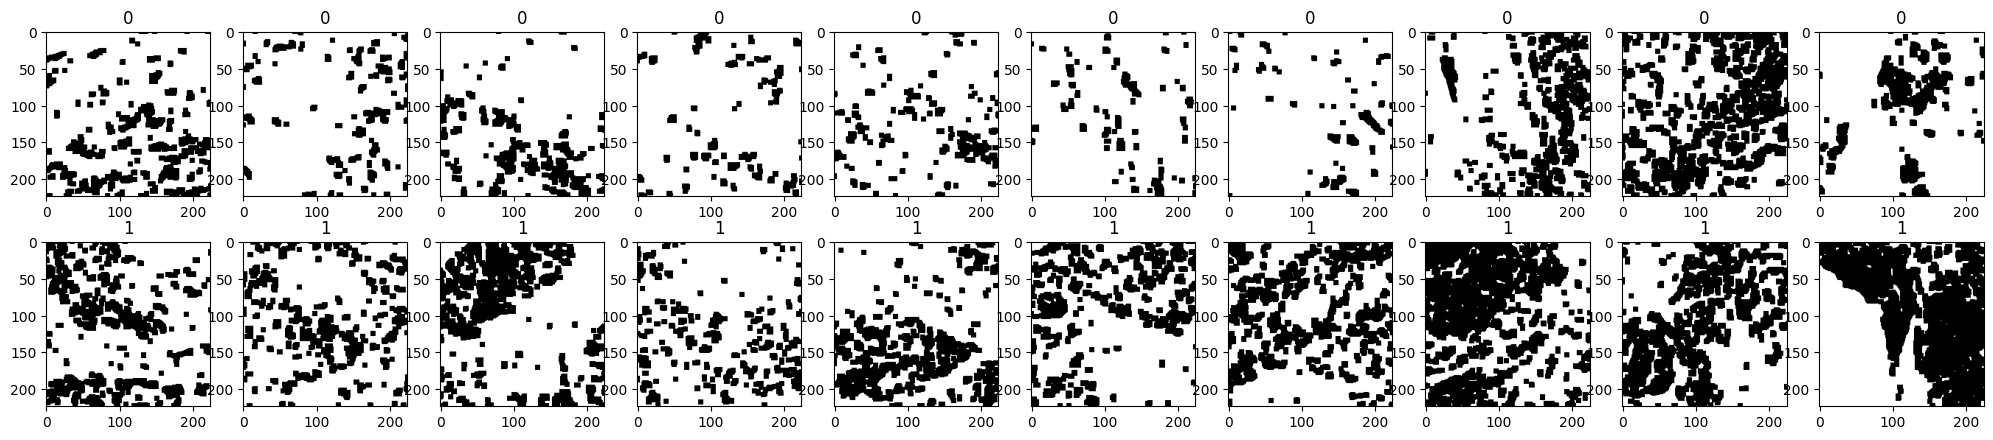

In [ ]:
# Set the number of masks to display from each class
len_img = 10  # Display 10 masks from each class

# Create a figure with subplots for displaying the masks (2 rows, 'len_img' columns)
fig, ax = plt.subplots(2, len_img, figsize=(25, 5))  # 2 rows and 'len_img' columns

# Loop through the first 'len_img' masks in the IMGS_MASK list for the 'non-tumour' class (first half of the dataset)
for i in range(0, len_img):
    # Display the mask from the 'tumour' class using grayscale colormap ('cmap="Grays"')
    ax[0][i].imshow(IMGS_MASK[i], cmap='Grays')
    # Set the title of the mask with the corresponding label ('1' for 'tumour' class)
    ax[0][i].set_title(LABELS[i])

# Loop through the next 'len_img' masks in the IMGS_MASK list for the 'non-tumour' class (second half of the dataset)
for i in range(0, len_img):
    # Display the mask from the 'non-tumour' class using grayscale colormap ('cmap="Grays"')
    ax[1][i].imshow(IMGS_MASK[len(IMGS)//2 + i], cmap='Grays')
    # Set the title of the mask with the corresponding label ('0' for 'non-tumour' class)
    ax[1][i].set_title(LABELS[len(IMGS)//2 + i])

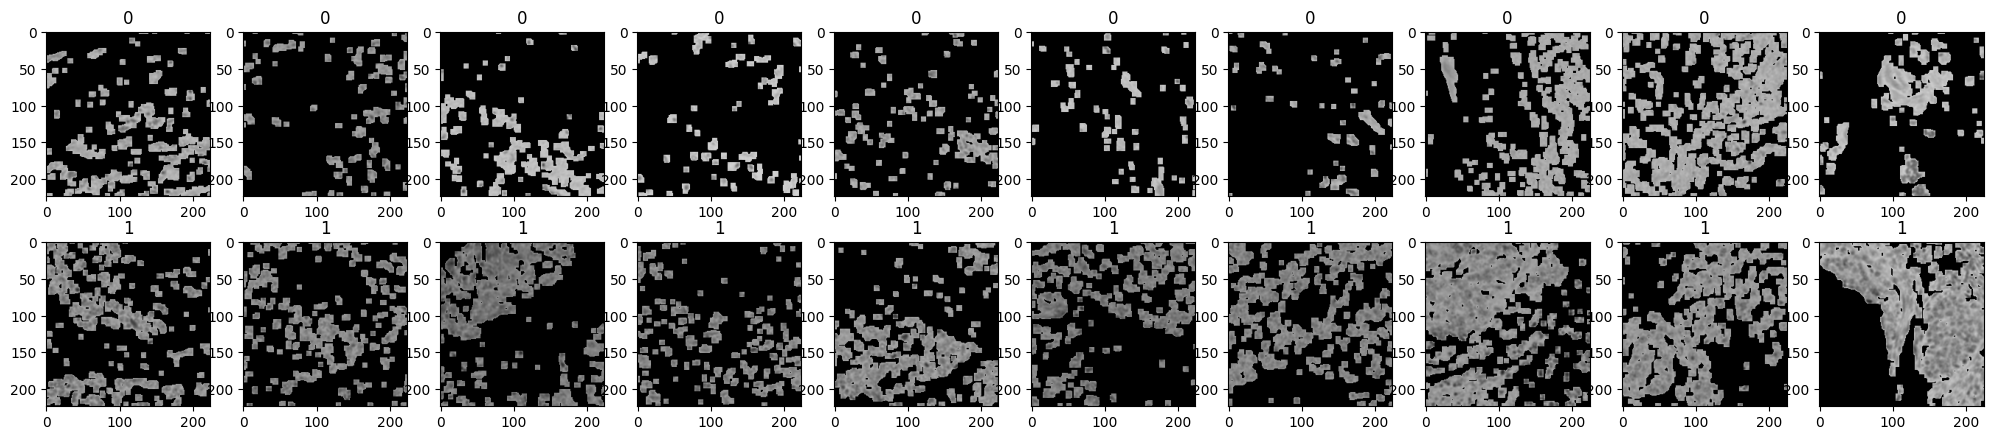

In [ ]:
# Set the number of segmented images to display from each class
len_img = 10  # Display 10 segmented images from each class

# Create a figure with subplots for displaying the segmented images (2 rows, 'len_img' columns)
fig, ax = plt.subplots(2, len_img, figsize=(25, 5))  # 2 rows and 'len_img' columns

# Loop through the first 'len_img' segmented grayscale images in the IMGS_SEG_GRAY list for the 'tumour' class (first half of the dataset)
for i in range(0, len_img):
    # Convert each grayscale segmented image to RGB and display it
    ax[0][i].imshow(cv2.cvtColor(IMGS_SEG_GRAY[i], cv2.COLOR_BGR2RGB))
    # Set the title of the image with the corresponding label ('1' for 'tumour' class)
    ax[0][i].set_title(LABELS[i])

# Loop through the next 'len_img' segmented grayscale images in the IMGS_SEG_GRAY list for the 'non-tumour' class (second half of the dataset)
for i in range(0, len_img):
    # Convert each grayscale segmented image to RGB and display it
    ax[1][i].imshow(cv2.cvtColor(IMGS_SEG_GRAY[len(IMGS)//2 + i], cv2.COLOR_BGR2RGB))
    # Set the title of the image with the corresponding label ('0' for 'non-tumour' class)
    ax[1][i].set_title(LABELS[len(IMGS)//2 + i])

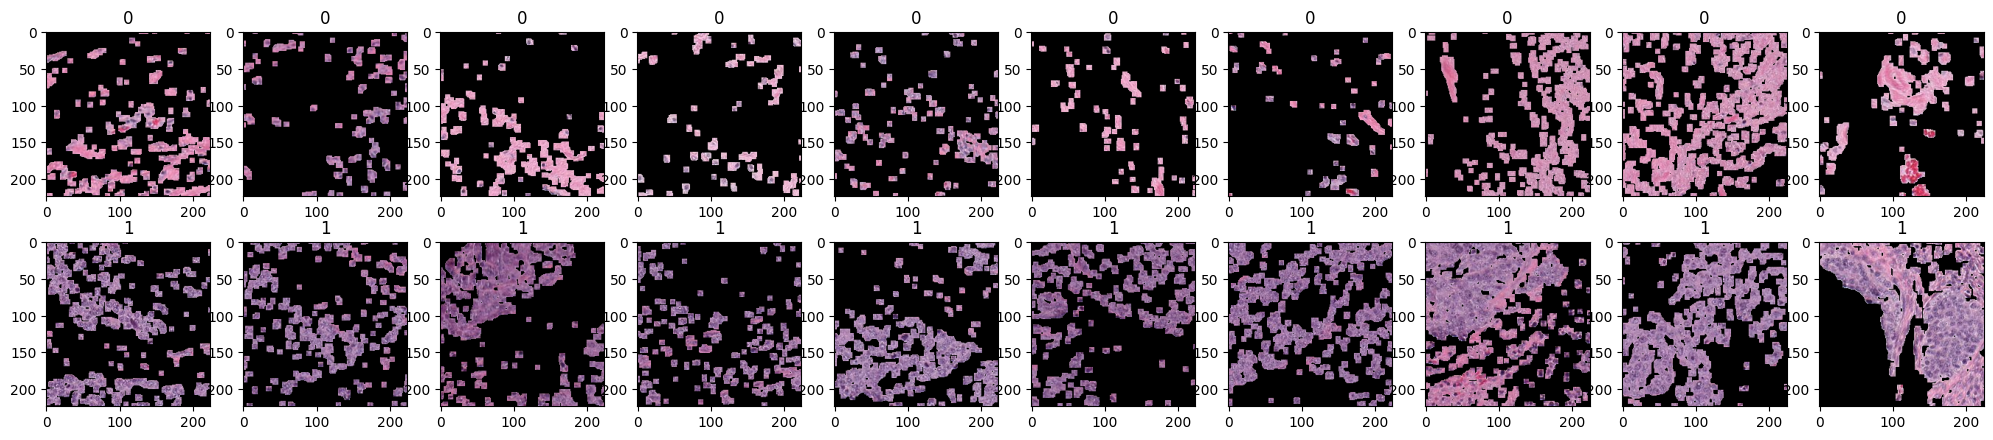

In [ ]:
# Set the number of segmented color images to display from each class
len_img = 10  # Display 10 segmented color images from each class

# Create a figure with subplots for displaying the segmented color images (2 rows, 'len_img' columns)
fig, ax = plt.subplots(2, len_img, figsize=(25, 5))  # 2 rows and 'len_img' columns

# Loop through the first 'len_img' segmented color images in the IMGS_SEG_COLOR list for the 'tumour' class (first half of the dataset)
for i in range(0, len_img):
    # Convert each color segmented image to RGB and display it
    ax[0][i].imshow(cv2.cvtColor(IMGS_SEG_COLOR[i], cv2.COLOR_BGR2RGB))
    # Set the title of the image with the corresponding label ('1' for 'tumour' class)
    ax[0][i].set_title(LABELS[i])

# Loop through the next 'len_img' segmented color images in the IMGS_SEG_COLOR list for the 'non-tumour' class (second half of the dataset)
for i in range(0, len_img):
    # Convert each color segmented image to RGB and display it
    ax[1][i].imshow(cv2.cvtColor(IMGS_SEG_COLOR[len(IMGS)//2 + i], cv2.COLOR_BGR2RGB))
    # Set the title of the image with the corresponding label ('0' for 'non-tumour' class)
    ax[1][i].set_title(LABELS[len(IMGS)//2 + i])

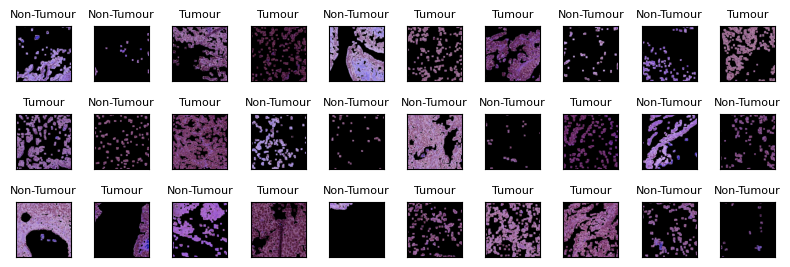

In [ ]:
# Convert IMGS and LABELS to NumPy arrays
X = np.array(IMGS_SEG_COLOR)
y = np.array(LABELS)

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define class names
data_class_names = {
 0: "Non-Tumour", 1: "Tumour",
}

# Plot a subset of images in a 3-row by 10-column subplots
fig, axes = plt.subplots(3, 10, figsize=(10, 3),
                         subplot_kw={'xticks': [], 'yticks': []},  # Hide x/y-axis ticks
                         gridspec_kw=dict(hspace=0.6, wspace=0.1))  # Adjust spacing

# Select 30 random images from the training set
indices = np.random.choice(len(x_train), 30, replace=False) # Now x_train is defined

# Iterate through the subplots and display images with labels
for ax, idx in zip(axes.flat, indices):
    ax.imshow(x_train[idx])  # Display the image
    ax.set_title(data_class_names[y_train[idx]], fontsize=8)  # Set class label #Fixed index error

# Show the plot
plt.show()

In [ ]:
# Convert IMGS and LABELS to NumPy arrays (again, to get original y_train)
X = np.array(IMGS_SEG_COLOR)
y = np.array(LABELS)

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Split the training data into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=0
)

# One-hot encode the target variables after splitting the data
# Ensure that you are not accidentally encoding them again before training
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (1920, 224, 224, 3)
y_train shape: (1920, 2)
X_val shape: (480, 224, 224, 3)
y_val shape: (480, 2)


In [ ]:
## Library Import
import keras
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.models import Sequential                 # Sequential model is a linear stack of layers where data flows from one layer to the next.
from keras.layers import Dense                      # Dense: A fully connected (FC) layer where each neuron is connected to all neurons in the previous layer.
from keras.layers import Dropout                    # Dropout: A regularization technique that randomly disables a fraction of neurons during training.

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical



# **MobileNetV2**

In [ ]:
# Instantiate a Keras Sequential object
cnn_base = Sequential()

# Add MobileNetV2 as the feature extractor
mobilenet_base = MobileNetV2(input_shape=(224,224,3), include_top=False, weights='imagenet')

# Freeze the base model layers (to use pre-trained features)
mobilenet_base.trainable = False

cnn_base.add(mobilenet_base)  # Add MobileNetV2 base model

# Replace Flatten with GlobalAveragePooling (reduces overfitting)
cnn_base.add(GlobalAveragePooling2D())

# Fully Connected Layers
cnn_base.add(Dense(units=512, activation="relu"))  # Instead of 4096, use 512 to reduce complexity
cnn_base.add(Dropout(0.3))  # Dropout to prevent overfitting
cnn_base.add(Dense(units=2, activation="softmax"))  # Output layer for 2 classes

# Display model summary
cnn_base.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,914,882 (11.12 MB)

 Trainable params: 656,898 (2.51 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
'''Import Keras losses, metrics, and optimizers classes
from keras.losses import CategoricalCrossentropy
from keras.metrics import CategoricalAccuracy
from keras.optimizers import Adam
# Import to_categorical for one-hot encoding
from tensorflow.keras.utils import to_categorical'''

# Compile the model
cnn_base.compile(optimizer=Adam(learning_rate=0.05),
              loss=CategoricalCrossentropy(),
              metrics=[CategoricalAccuracy()])

# Train the model
hist_base = cnn_base.fit(X_train, y_train, epochs=150, batch_size=256, validation_data=(X_val, y_val))

Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - categorical_accuracy: 0.5147 - loss: 72.7421 - val_categorical_accuracy: 0.6062 - val_loss: 10.3169
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 246ms/step - categorical_accuracy: 0.6713 - loss: 5.0520 - val_categorical_accuracy: 0.7958 - val_loss: 2.4994
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - categorical_accuracy: 0.7742 - loss: 1.4309 - val_categorical_accuracy: 0.6833 - val_loss: 1.2435
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 246ms/step - categorical_accuracy: 0.7001 - loss: 0.6560 - val_categorical_accuracy: 0.7625 - val_loss: 0.7735
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step - categorical_accuracy: 0.7596 - loss: 0.4827 - val_categorical_accuracy: 0.7958 - val_loss: 0.5232
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 250ms/step - categorical_accuracy: 0.7871 - loss: 0.4512 - val_categorical_accuracy: 0.7979 - val_loss: 0.5390
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 250ms/step - categorical_accuracy: 0.7993 - loss: 0.41

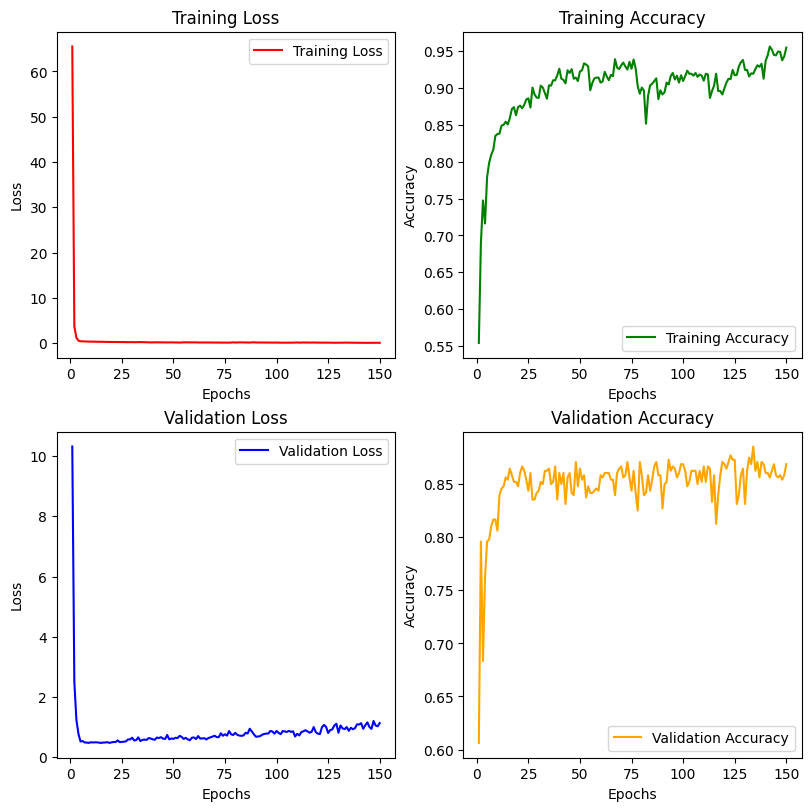

In [ ]:
# Extract model losses and accuracy values during training
training_losses = hist_base.history["loss"]
training_accuracy = hist_base.history["categorical_accuracy"]
validation_losses = hist_base.history["val_loss"]
validation_accuracy = hist_base.history["val_categorical_accuracy"]
epochs = range(1, len(training_losses) + 1)

# Plot the history of training losses and accuracy values
fig, axes = plt.subplots(2, 2, figsize=(8, 8), constrained_layout=True)

# Top-left: Training Loss
axes[0, 0].plot(epochs, training_losses, label="Training Loss", color='red')
axes[0, 0].set_title('Training Loss')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# Top-right: Training Accuracy
axes[0, 1].plot(epochs, training_accuracy, label="Training Accuracy", color='green')
axes[0, 1].set_title('Training Accuracy')
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()

# Bottom-left: Validation Loss
axes[1, 0].plot(epochs, validation_losses, label="Validation Loss", color='blue')
axes[1, 0].set_title('Validation Loss')
axes[1, 0].set_xlabel('Epochs')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

# Bottom-right: Validation Accuracy
axes[1, 1].plot(epochs, validation_accuracy, label="Validation Accuracy", color='orange')
axes[1, 1].set_title('Validation Accuracy')
axes[1, 1].set_xlabel('Epochs')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend()

plt.show()

Base Model Accuracy: 86.83%


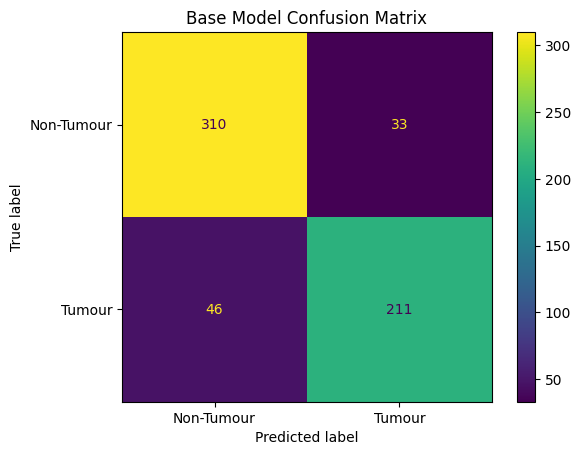

In [ ]:
# Obtain model predictions on the test dataset
# Assign the output to pred_base variable
# Set the verbosity to 0
pred_base = cnn_base.predict(x_test, verbose=0)

# Evaluate the model using the test datapoints
# Assign the output to eval_base variable
# Set the verbosity to 0
# Convert y_test to one-hot encoding to match the output shape of the model
y_test_onehot = to_categorical(y_test, num_classes=2)  # Assuming 2 classes
eval_base = cnn_base.evaluate(x_test, y_test_onehot, verbose=0)

# Display the accuracy
print(f"Base Model Accuracy: {eval_base[1]*100:.2f}%")

# Compute and display the confusion matrix
cm_base = confusion_matrix(np.argmax(y_test_onehot, axis=1),
                           np.argmax(pred_base, axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_base,
                              display_labels=data_class_names.values())
disp.plot()
plt.title("Base Model Confusion Matrix")
plt.show()

#**INCEPTION V3**

In [ ]:
# prompt: INCEPTION V3

# #**INCEPTION V3**
# Instantiate a Keras Sequential object
cnn_base = Sequential()

# Add InceptionV3 as the feature extractor
inception_base = InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model layers
inception_base.trainable = False

cnn_base.add(inception_base)
cnn_base.add(GlobalAveragePooling2D())
cnn_base.add(Dense(units=512, activation="relu"))
cnn_base.add(Dropout(0.3))
cnn_base.add(Dense(units=2, activation="softmax"))

cnn_base.summary()


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 5, 5, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,852,898 (87.18 MB)

 Trainable params: 1,050,114 (4.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
# Compile the model
cnn_base.compile(optimizer=Adam(learning_rate=0.001),
                       loss=CategoricalCrossentropy(),
                       metrics=[CategoricalAccuracy()])

# Train the model
hist_inception = cnn_base.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

# Obtain model predictions on the test dataset
pred_inception = cnn_base.predict(X_val, verbose=0)

# Evaluate the model using the test datapoints
eval_inception = cnn_base.evaluate(X_val, y_val, verbose=0)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 38s 566ms/step - categorical_accuracy: 0.6144 - loss: 9.3680 - val_categorical_accuracy: 0.7021 - val_loss: 2.2869
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - categorical_accuracy: 0.6831 - loss: 1.5915 - val_categorical_accuracy: 0.7583 - val_loss: 0.5833
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - categorical_accuracy: 0.7328 - loss: 0.6146 - val_categorical_accuracy: 0.7521 - val_loss: 0.5525
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - categorical_accuracy: 0.7676 - loss: 0.5073 - val_categorical_accuracy: 0.7563 - val_loss: 0.5334
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - categorical_accuracy: 0.7608 - loss: 0.4918 - val_categorical_accuracy: 0.7604 - val_loss: 0.5216
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - categorical_accuracy: 0.7867 - loss: 0.4824 - val_categorical_accuracy: 0.7417 - val_loss: 0.5287
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - categorical_accuracy: 0.76

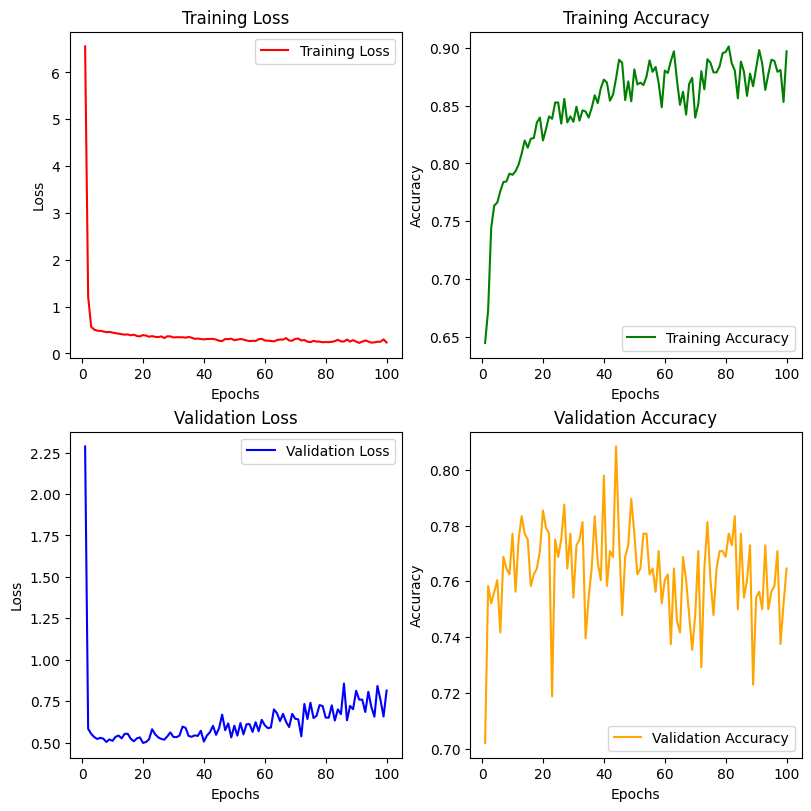

In [ ]:
# Extract model losses and accuracy values during training
training_losses = hist_inception.history["loss"]
training_accuracy = hist_inception.history["categorical_accuracy"]
validation_losses = hist_inception.history["val_loss"]
validation_accuracy = hist_inception.history["val_categorical_accuracy"]
epochs = range(1, len(training_losses) + 1)

# Plot the history of training losses and accuracy values
fig, axes = plt.subplots(2, 2, figsize=(8, 8), constrained_layout=True)

# Top-left: Training Loss
axes[0, 0].plot(epochs, training_losses, label="Training Loss", color='red')
axes[0, 0].set_title('Training Loss')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# Top-right: Training Accuracy
axes[0, 1].plot(epochs, training_accuracy, label="Training Accuracy", color='green')
axes[0, 1].set_title('Training Accuracy')
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()

# Bottom-left: Validation Loss
axes[1, 0].plot(epochs, validation_losses, label="Validation Loss", color='blue')
axes[1, 0].set_title('Validation Loss')
axes[1, 0].set_xlabel('Epochs')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

# Bottom-right: Validation Accuracy
axes[1, 1].plot(epochs, validation_accuracy, label="Validation Accuracy", color='orange')
axes[1, 1].set_title('Validation Accuracy')
axes[1, 1].set_xlabel('Epochs')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend()

plt.show()

Base Model Accuracy: 76.33%


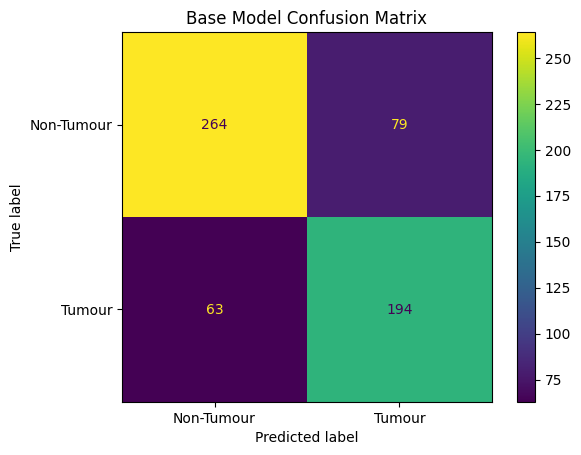

In [ ]:
# Obtain model predictions on the test dataset
# Assign the output to pred_base variable
# Set the verbosity to 0
pred_base = cnn_base.predict(x_test, verbose=0)

# Evaluate the model using the test datapoints
# Assign the output to eval_base variable
# Set the verbosity to 0
# Convert y_test to one-hot encoding to match the output shape of the model
y_test_onehot = to_categorical(y_test, num_classes=2)  # Assuming 2 classes
eval_base = cnn_base.evaluate(x_test, y_test_onehot, verbose=0)

# Display the accuracy
print(f"Base Model Accuracy: {eval_base[1]*100:.2f}%")

# Compute and display the confusion matrix
cm_base = confusion_matrix(np.argmax(y_test_onehot, axis=1),
                           np.argmax(pred_base, axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_base,
                              display_labels=data_class_names.values())
disp.plot()
plt.title("Base Model Confusion Matrix")
plt.show()

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten, BatchNormalization


In [ ]:
# Instantiate a Keras Sequential object.
cnn_base = Sequential()

# Add the Conv2D and MaxPooling layers
# First Convolutional + MaxPooling block
cnn_base.add(Conv2D(input_shape=(224,224,3),filters=32,kernel_size=(3,3),padding="same", activation="relu")) # 34 filters
cnn_base.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
cnn_base.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
cnn_base.add(BatchNormalization())

# Second Convolutional + MaxPooling block
cnn_base.add(Conv2D(filters=64,kernel_size=(1,1),padding="same", activation="relu"))
cnn_base.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
cnn_base.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
cnn_base.add(BatchNormalization())

# Third Convolutional + MaxPooling block
cnn_base.add(Conv2D(filters=128,kernel_size=(1,1),padding="same", activation="relu"))
cnn_base.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
cnn_base.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
cnn_base.add(BatchNormalization())

# Fourth Convolutional + MaxPooling block
cnn_base.add(Conv2D(filters=256, kernel_size=(1,1), padding="same", activation="relu"))
cnn_base.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
cnn_base.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
cnn_base.add(BatchNormalization())

# Add the Flatten layer to convert 2D feature maps to 1D
cnn_base.add(GlobalAveragePooling2D())

# Add Dense layers
cnn_base.add(Dense(units=1024,activation="relu"))   # Fully connected layer with 1024 neurons
cnn_base.add(Dropout(0.5))
cnn_base.add(Dense(512, activation="relu"))
cnn_base.add(Dropout(0.5))
cnn_base.add(Dense(units=2, activation="softmax"))  # Output layer with 10 classes (softmax activation)

# Display the model summary
cnn_base.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_102 (Conv2D)                  │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_103 (Conv2D)                  │ (None, 224, 224, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_98               │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_104 (Conv2D)                  │ (None, 112, 112, 64)        │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_105 (Conv2D)                  │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_99               │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_106 (Conv2D)                  │ (None, 56, 56, 128)         │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_107 (Conv2D)                  │ (None, 56, 56, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_100              │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_108 (Conv2D)                  │ (None, 28, 28, 256)         │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_109 (Conv2D)                  │ (None, 28, 28, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_101              │ (None, 14, 14, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1024)                │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1024)                │              

 Total params: 1,619,106 (6.18 MB)

 Trainable params: 1,618,146 (6.17 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
# Configure the network for training
cnn_base.compile(optimizer=Adam(learning_rate=0.0001),
              loss=CategoricalCrossentropy(),
              metrics=[CategoricalAccuracy()])

# Train the model
hist_base = cnn_base.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - categorical_accuracy: 0.7581 - loss: 0.4860 - val_categorical_accuracy: 0.4750 - val_loss: 0.7972
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - categorical_accuracy: 0.8712 - loss: 0.3081 - val_categorical_accuracy: 0.4875 - val_loss: 0.8583
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - categorical_accuracy: 0.8828 - loss: 0.2752 - val_categorical_accuracy: 0.7104 - val_loss: 0.5622
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - categorical_accuracy: 0.8870 - loss: 0.2673 - val_categorical_accuracy: 0.5625 - val_loss: 1.0660
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - categorical_accuracy: 0.8984 - loss: 0.2583 - val_categorical_accuracy: 0.6708 - val_loss: 0.8329
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - categorical_accuracy: 0.9064 - loss: 0.2408 - val_categorical_accuracy: 0.7354 - val_loss: 0.6677
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - categorical_accuracy: 0.9224 -

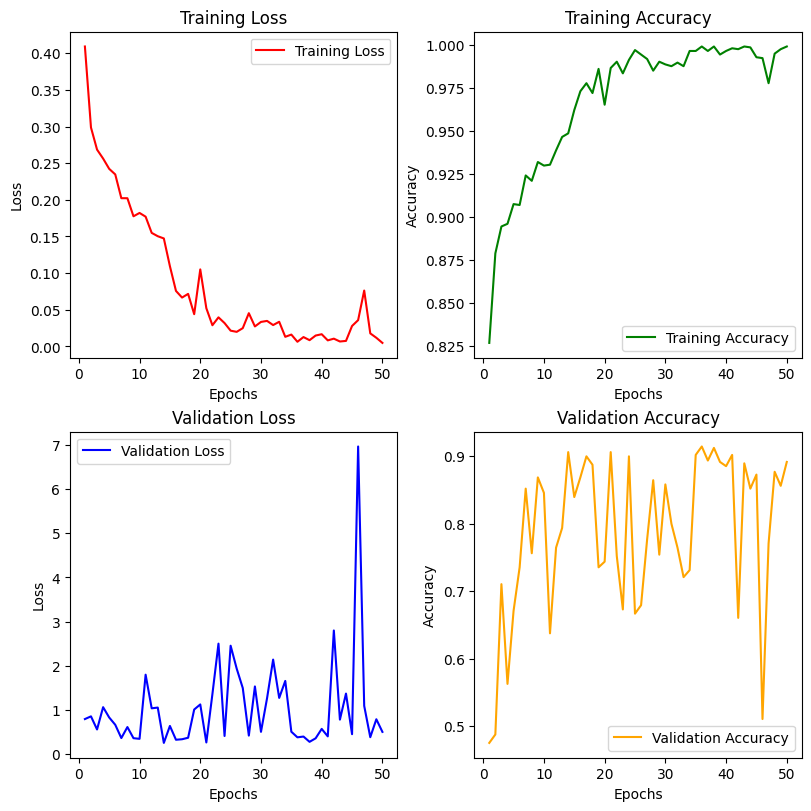

In [ ]:
# Extract model losses and accuracy values during training
training_losses = hist_base.history["loss"]
training_accuracy = hist_base.history["categorical_accuracy"]
validation_losses = hist_base.history["val_loss"]
validation_accuracy = hist_base.history["val_categorical_accuracy"]
epochs = range(1, len(training_losses) + 1)

# Plot the history of training losses and accuracy values
fig, axes = plt.subplots(2, 2, figsize=(8, 8), constrained_layout=True)

# Top-left: Training Loss
axes[0, 0].plot(epochs, training_losses, label="Training Loss", color='red')
axes[0, 0].set_title('Training Loss')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# Top-right: Training Accuracy
axes[0, 1].plot(epochs, training_accuracy, label="Training Accuracy", color='green')
axes[0, 1].set_title('Training Accuracy')
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()

# Bottom-left: Validation Loss
axes[1, 0].plot(epochs, validation_losses, label="Validation Loss", color='blue')
axes[1, 0].set_title('Validation Loss')
axes[1, 0].set_xlabel('Epochs')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

# Bottom-right: Validation Accuracy
axes[1, 1].plot(epochs, validation_accuracy, label="Validation Accuracy", color='orange')
axes[1, 1].set_title('Validation Accuracy')
axes[1, 1].set_xlabel('Epochs')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend()

plt.show()

Base Model Accuracy: 91.67%


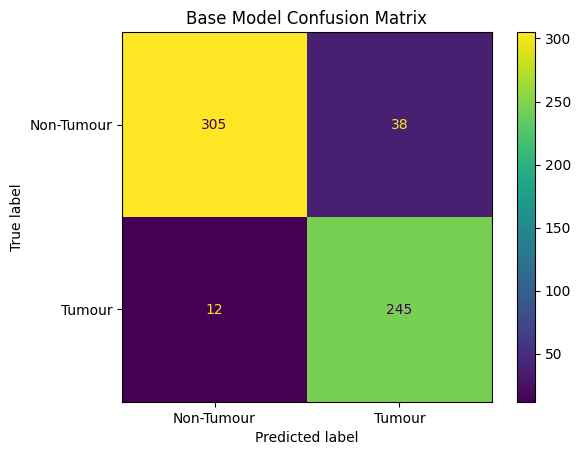

In [ ]:
# Obtain model predictions on the test dataset
# Assign the output to pred_base variable
# Set the verbosity to 0
pred_base = cnn_base.predict(x_test, verbose=0)

# Evaluate the model using the test datapoints
# Assign the output to eval_base variable
# Set the verbosity to 0
# Convert y_test to one-hot encoding to match the output shape of the model
y_test_onehot = to_categorical(y_test, num_classes=2)  # Assuming 2 classes
eval_base = cnn_base.evaluate(x_test, y_test_onehot, verbose=0)

# Display the accuracy
print(f"Base Model Accuracy: {eval_base[1]*100:.2f}%")

# Compute and display the confusion matrix
cm_base = confusion_matrix(np.argmax(y_test_onehot, axis=1),
                           np.argmax(pred_base, axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_base,
                              display_labels=data_class_names.values())
disp.plot()
plt.title("Base Model Confusion Matrix")
plt.show()